In [813]:
# Some import important library

In [1]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime

In [2]:
df=pd.read_csv('C:\\Users\\Imran\\Desktop\\Covid 19\\covid_19_india.csv')

In [3]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [4]:
df.shape

(1091, 9)

In [5]:
df.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [6]:
df.keys()

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [7]:
#Converting string Date time into Python Date time object
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df1 = df.groupby('Date').sum()

In [8]:
#Making new columns of Recovery and Death_Rate
df1['Recovery_Rate'] = df1['Cured']/df1['Confirmed']
df1['Death_Rate'] = df1['Deaths']/df1['Confirmed']
df1

,Sno,Cured,Deaths,Confirmed,Recovery_Rate,Death_Rate
Date,,,,,,
2020-01-30,1,0,0,1,0.000000,0.000000
2020-01-31,2,0,0,1,0.000000,0.000000
2020-02-01,3,0,0,2,0.000000,0.000000
2020-02-02,4,0,0,3,0.000000,0.000000
2020-02-03,5,0,0,3,0.000000,0.000000
...,...,...,...,...,...,...
2020-04-14,31119,1190,353,10815,0.110032,0.032640
2020-04-15,32208,1344,392,11933,0.112629,0.032850
2020-04-16,33297,1515,420,12759,0.118740,0.032918


In [9]:
df1.keys()

Index(['Sno', 'Cured', 'Deaths', 'Confirmed', 'Recovery_Rate', 'Death_Rate'], dtype='object')

In [10]:
df.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
5,6,2020-02-04,6:00 PM,Kerala,3,0,0,0,3
6,7,2020-02-05,6:00 PM,Kerala,3,0,0,0,3
7,8,2020-02-06,6:00 PM,Kerala,3,0,0,0,3
8,9,2020-02-07,6:00 PM,Kerala,3,0,0,0,3
9,10,2020-02-08,6:00 PM,Kerala,3,0,0,0,3


In [11]:
df.columns.values

array(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'], dtype=object)

In [12]:
df.dtypes

Sno                                  int64
Date                        datetime64[ns]
Time                                object
State/UnionTerritory                object
ConfirmedIndianNational             object
ConfirmedForeignNational            object
Cured                                int64
Deaths                               int64
Confirmed                            int64
dtype: object

In [13]:
#Printing a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 9 columns):
Sno                         1091 non-null int64
Date                        1091 non-null datetime64[ns]
Time                        1091 non-null object
State/UnionTerritory        1091 non-null object
ConfirmedIndianNational     1091 non-null object
ConfirmedForeignNational    1091 non-null object
Cured                       1091 non-null int64
Deaths                      1091 non-null int64
Confirmed                   1091 non-null int64
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 76.8+ KB


In [14]:
#Getting sum Statical details
df.describe()

,Sno,Cured,Deaths,Confirmed
count,1091.000000,1091.000000,1091.000000,1091.000000
mean,546.000000,12.891842,3.867094,127.686526
std,315.088876,35.443808,15.969056,318.621234
min,1.000000,0.000000,0.000000,0.000000
25%,273.500000,0.000000,0.000000,3.000000
50%,546.000000,1.000000,0.000000,15.000000
75%,818.500000,9.000000,2.000000,80.000000
max,1091.000000,331.000000,201.000000,3323.000000


In [15]:
df.drop('Sno', axis = 1,inplace=True)

In [16]:
#As the data is cumulative, so printing last 36 values of the data.
df.tail(36)

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
1055,2020-04-17,5:00 PM,Uttarakhand,-,-,9,0,37
1056,2020-04-17,5:00 PM,Uttar Pradesh,-,-,74,14,846
1057,2020-04-17,5:00 PM,West Bengal,-,-,51,10,255
1058,2020-04-18,5:00 PM,Andaman and Nicobar Islands,-,-,11,0,12
1059,2020-04-18,5:00 PM,Andhra Pradesh,-,-,42,15,603
1060,2020-04-18,5:00 PM,Arunachal Pradesh,-,-,0,0,1
1061,2020-04-18,5:00 PM,Assam,-,-,9,1,35
1062,2020-04-18,5:00 PM,Bihar,-,-,37,2,85
1063,2020-04-18,5:00 PM,Chandigarh,-,-,9,0,21
1064,2020-04-18,5:00 PM,Chhattisgarh,-,-,24,0,36


In [17]:
#Total Deaths and confrimed values
Total_Cured = print('Total Cured:',(df.iloc[-36:-1]['Cured'].sum()))

Total Cured: 2094


In [18]:
Total_Death = print('Total Death:',(df.iloc[-36:-1]['Deaths'].sum()))

Total Death: 502


In [19]:
Total_Confirmed = print('Total Confirmed:',(df.iloc[-36:-1]['Confirmed'].sum()))

Total Confirmed: 15643


In [20]:
#Printing all the different states in a list

In [21]:
State = list(set(df['State/UnionTerritory'].values.tolist()))
State.sort()
print(State)

['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Nagaland#', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telengana', 'Tripura', 'Unassigned', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']


In [22]:
string = 'State/UnionTerritory'
print(len(string)) 

20


In [23]:
df[df['State/UnionTerritory']=='Uttar Pradesh'].tail()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
957,2020-04-14,5:00 PM,Uttar Pradesh,-,-,49,5,657
990,2020-04-15,5:00 PM,Uttar Pradesh,-,-,51,11,735
1023,2020-04-16,5:00 PM,Uttar Pradesh,-,-,68,13,773
1056,2020-04-17,5:00 PM,Uttar Pradesh,-,-,74,14,846
1089,2020-04-18,5:00 PM,Uttar Pradesh,-,-,86,14,969


In [24]:
#Total Cured, Deaths and Confirmed values in each state

In [25]:
Cured = df.groupby('State/UnionTerritory').max()[['Cured']]
Cured

,Cured
State/UnionTerritory,
Andaman and Nicobar Islands,11
Andhra Pradesh,42
Arunachal Pradesh,0
Assam,9
Bihar,37
Chandigarh,9
Chhattisgarh,24
Delhi,72
Goa,6


In [26]:
Confirmed = df.groupby('State/UnionTerritory').max()[['Confirmed']]
Confirmed

,Confirmed
State/UnionTerritory,
Andaman and Nicobar Islands,12
Andhra Pradesh,603
Arunachal Pradesh,1
Assam,35
Bihar,85
Chandigarh,21
Chhattisgarh,36
Delhi,1707
Goa,7


In [28]:
Deaths = df.groupby('State/UnionTerritory').max()[['Deaths']]
Deaths

,Deaths
State/UnionTerritory,
Andaman and Nicobar Islands,0
Andhra Pradesh,15
Arunachal Pradesh,0
Assam,1
Bihar,2
Chandigarh,0
Chhattisgarh,0
Delhi,42
Goa,0


In [76]:
#Cases in india State Wise
df.groupby(['State/UnionTerritory'])["Cured"].sum().sort_values(ascending=False)

State/UnionTerritory
Maharashtra                    2798
Kerala                         2250
Telengana                      1125
Rajasthan                      1045
Tamil Nadu                      988
Uttar Pradesh                   822
Karnataka                       736
Haryana                         647
Gujarat                         645
Delhi                           544
West Bengal                     381
Madhya Pradesh                  357
Jammu and Kashmir               225
Bihar                           203
Andhra Pradesh                  193
Ladakh                          175
Chhattisgarh                    173
Punjab                          163
Odisha                          130
Himachal Pradesh                117
Uttarakhand                      98
Chandigarh                       88
Andaman and Nicobar Islands      71
Goa                              39
Puducherry                       20
Assam                            19
Manipur                          10
Tripura

In [77]:
df.groupby(['State/UnionTerritory'])['Confirmed'].sum().sort_values(ascending=False)

State/UnionTerritory
Maharashtra                    28623
Delhi                          16498
Tamil Nadu                     14645
Rajasthan                      10455
Madhya Pradesh                  9019
Uttar Pradesh                   8658
Telengana                       8448
Kerala                          7909
Gujarat                         7601
Andhra Pradesh                  6202
Karnataka                       4394
Jammu and Kashmir               3457
Haryana                         2968
West Bengal                     2516
Punjab                          2475
Bihar                            976
Odisha                           712
Uttarakhand                      574
Ladakh                           470
Assam                            464
Chandigarh                       418
Himachal Pradesh                 409
Chhattisgarh                     385
Jharkhand                        241
Andaman and Nicobar Islands      227
Unassigned                       161
Goa              

In [78]:
df.groupby(['State/UnionTerritory'])['Deaths'].sum().sort_values(ascending=False)

State/UnionTerritory
Maharashtra                    1767
Madhya Pradesh                  503
Gujarat                         388
Delhi                           316
Telengana                       188
Punjab                          173
Karnataka                       144
Tamil Nadu                      143
Andhra Pradesh                  104
West Bengal                     103
Uttar Pradesh                    98
Jammu and Kashmir                65
Rajasthan                        52
Kerala                           45
Haryana                          36
Bihar                            29
Himachal Pradesh                 26
Jharkhand                        15
Odisha                           12
Assam                             8
Meghalaya                         4
Ladakh                            0
Uttarakhand                       0
Puducherry                        0
Nagaland#                         0
Manipur                           0
Tripura                           0
Goa    

In [79]:
#day day cases
dbd_cases = df.groupby(["Date"])["ConfirmedIndianNational"].sum()
dbd_cases.head(50)

Date
2020-01-30                           1
2020-01-31                           1
2020-02-01                           2
2020-02-02                           3
2020-02-03                           3
2020-02-04                           3
2020-02-05                           3
2020-02-06                           3
2020-02-07                           3
2020-02-08                           3
2020-02-09                           3
2020-02-10                           3
2020-02-11                           3
2020-02-12                           3
2020-02-13                           3
2020-02-14                           3
2020-02-15                           3
2020-02-16                           3
2020-02-17                           3
2020-02-18                           3
2020-02-19                           3
2020-02-20                           3
2020-02-21                           3
2020-02-22                           3
2020-02-23                           3
2020-02-24          

In [80]:
#Cured['Cured'].plot.hist()

In [81]:
# Cured['Cured'].value_counts().sort_index().plot.bar()
# plt.xlabel('State')
# plt.ylabel('Cured')

In [82]:
df = df.groupby('Cured').sum().reset_index()
df

,Cured,Deaths,Confirmed
0,0,281,6922
1,1,91,3514
2,2,24,759
3,3,25,2063
4,4,43,1410
...,...,...,...
91,259,178,2687
92,283,15,1323
93,295,187,2919
94,300,194,3205


In [84]:
#Plot with a kernel density estimate and histogram for Active cases,Cured,Deaths and Confirmed cases

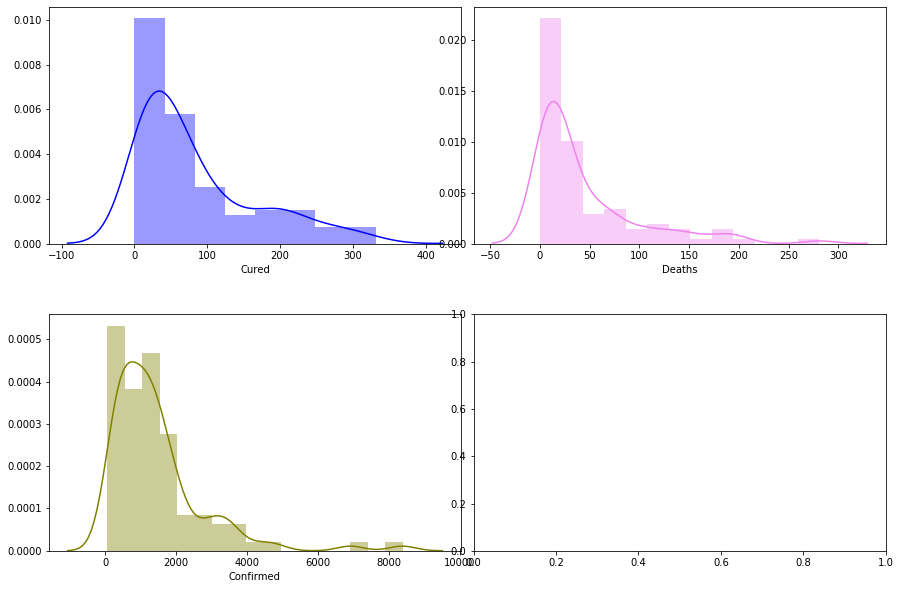

In [87]:
df['State/UnionTerritory']=df['Confirmed']-(df['Cured']+df['Deaths'])
f,axes = plt.subplots(2, 2, figsize=(15,10))
sns.distplot( df["Cured"] , color="blue", ax=axes[0, 0])
sns.distplot( df["Deaths"] , color="violet", ax=axes[0, 1])
sns.distplot( df["Confirmed"] , color="olive", ax=axes[1, 0])
#sns.distplot( covid["active"] , color="orange", ax=axes[1, 1])
f.subplots_adjust(hspace=.3,wspace=0.03) 

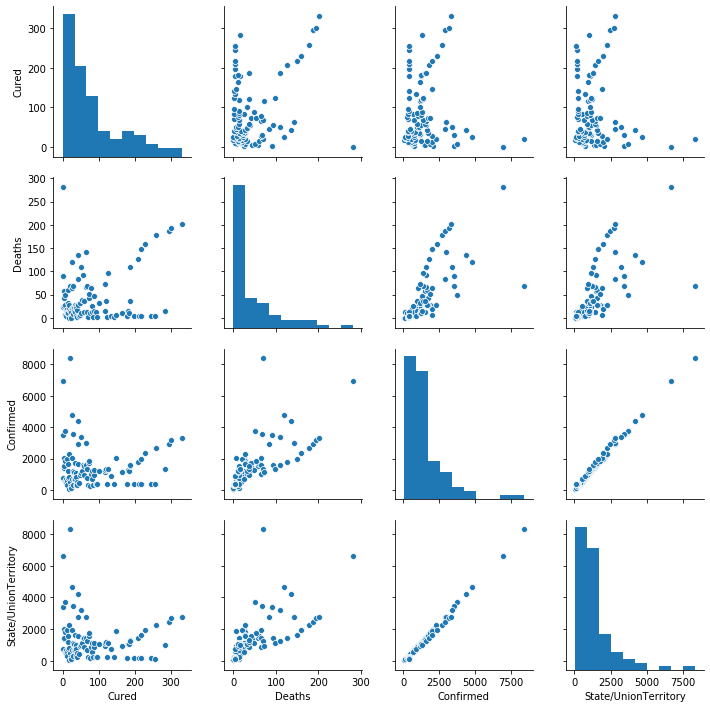

In [88]:
sns.pairplot(df, palette="Set2")

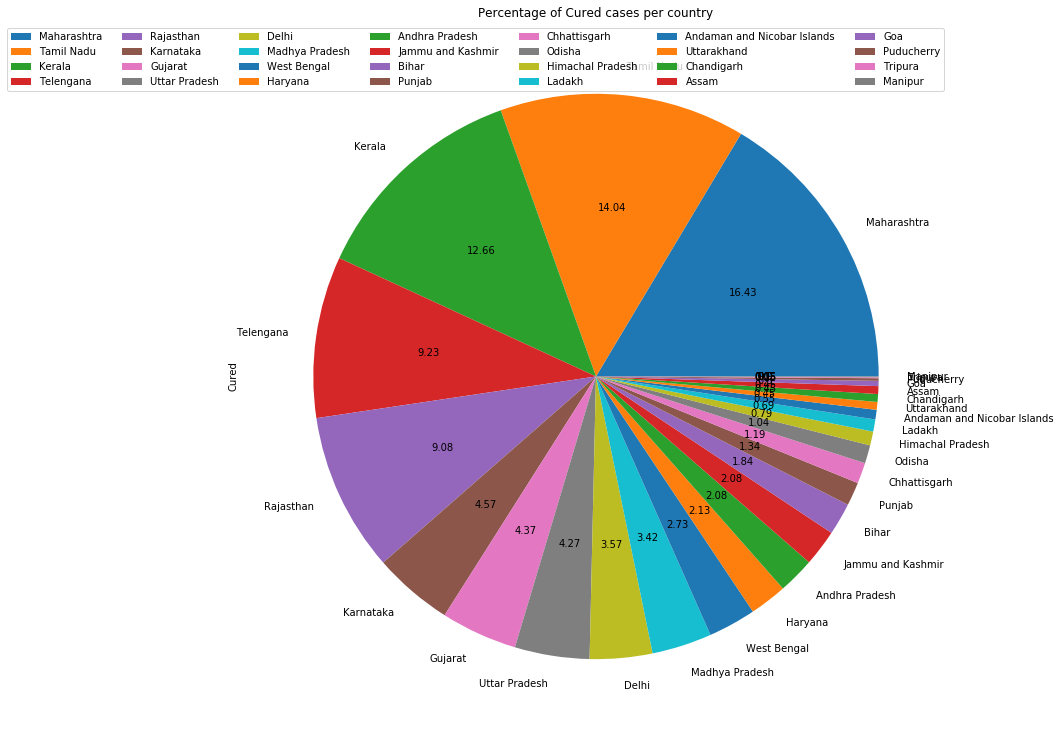

In [34]:
fig = plt.figure(figsize=(13,13))
cure_per_state = df.groupby('State/UnionTerritory')['Cured'].max().sort_values(ascending=False)
cure_sum=Cured
def absolute_value(val):
    a = val
    return (np.round(a,2))
cure_per_state.plot(kind='pie',title="Percentage of Cured cases per country",autopct=absolute_value)
plt.legend(loc=1, ncol = 7)
plt.show()

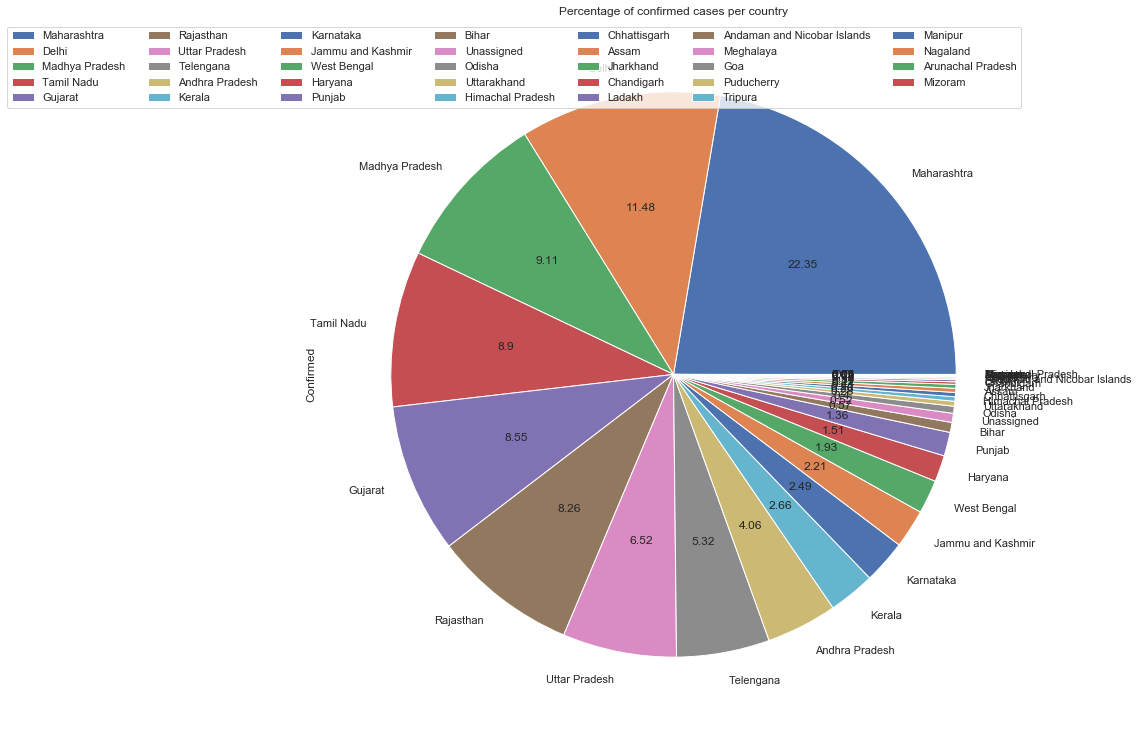

In [169]:
fig = plt.figure(figsize=(13,13))
conf_per_state = df.groupby('State/UnionTerritory')['Confirmed'].max().sort_values(ascending=False)
conf_sum=Confirmed#last rows sum
def absolute_value(val):
    a  = val
    return (np.round(a,2))
conf_per_state.plot(kind="pie",title='Percentage of confirmed cases per State',autopct=absolute_value)
plt.legend(loc=1, ncol = 7)
plt.show()

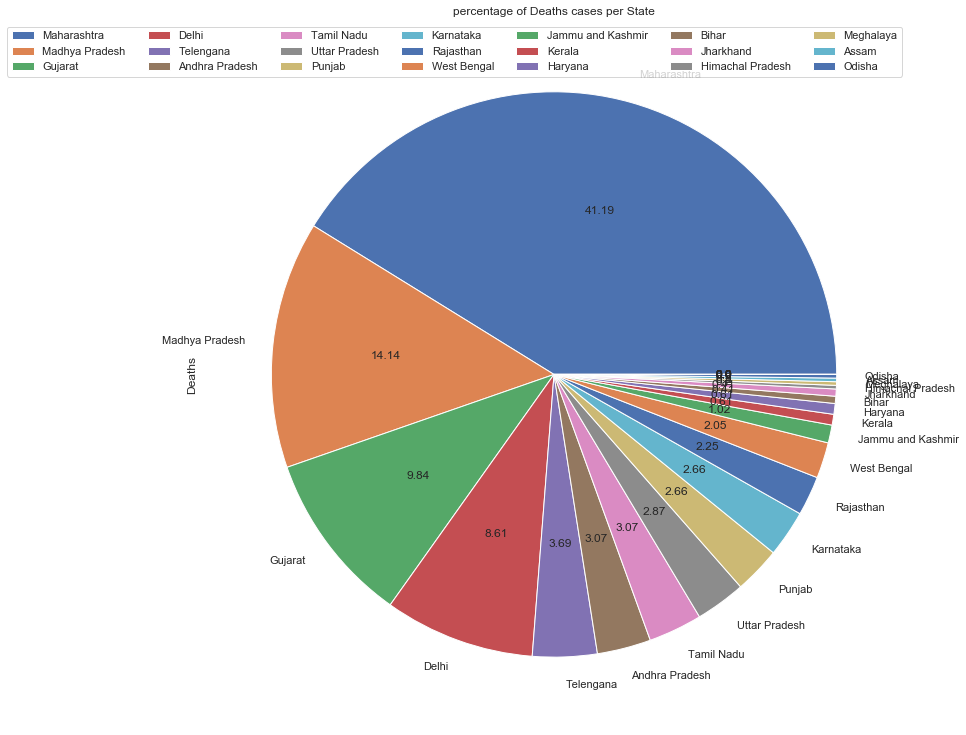

In [168]:
fig = plt.figure(figsize=(13,13))
Death_per_state = df.groupby('State/UnionTerritory')['Deaths'].max().sort_values(ascending=False)
Death_sum=Deaths
def absolute_value(val):
    a = val
    return (np.round(a,2))
Death_per_state.plot(kind='pie',title='percentage of Deaths cases per State',autopct=absolute_value)
plt.legend(loc=1, ncol = 7)
plt.show()